 # Machine Learning - Regressão Linear

 ## Regressão Linear aplicada ao dados do mercado financeiro (Ações da Petrobras) 

- O Objetivo é criar um modelo que consiga predizer o valor de fechamento de uma ação.
- Vamos treinar o algoritmo e validar o modelo.

#### Imports Libs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
sns.set(style="whitegrid")

%matplotlib inline

**Lendo o arquivo de dados**

In [4]:
df = pd.read_csv('petr4.csv')

**Verificando o cabeçalho e as informações do DataFrame**

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume
0,11-Apr-17,14.97,14.99,14.55,14.68,38392300
1,10-Apr-17,14.90,14.94,14.70,14.94,37541700
2,7-Apr-17,14.61,14.90,14.60,14.70,32944900
3,6-Apr-17,14.62,14.87,14.42,14.53,34386000
4,5-Apr-17,15.05,15.16,14.50,14.57,49623400


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1802 non-null   object 
 1   Open    1802 non-null   float64
 2   High    1802 non-null   float64
 3   Low     1802 non-null   float64
 4   Close   1802 non-null   float64
 5   Volume  1802 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 84.6+ KB


**Verificando se existem dados faltantes** 

In [7]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

**Verificando todas as relações**

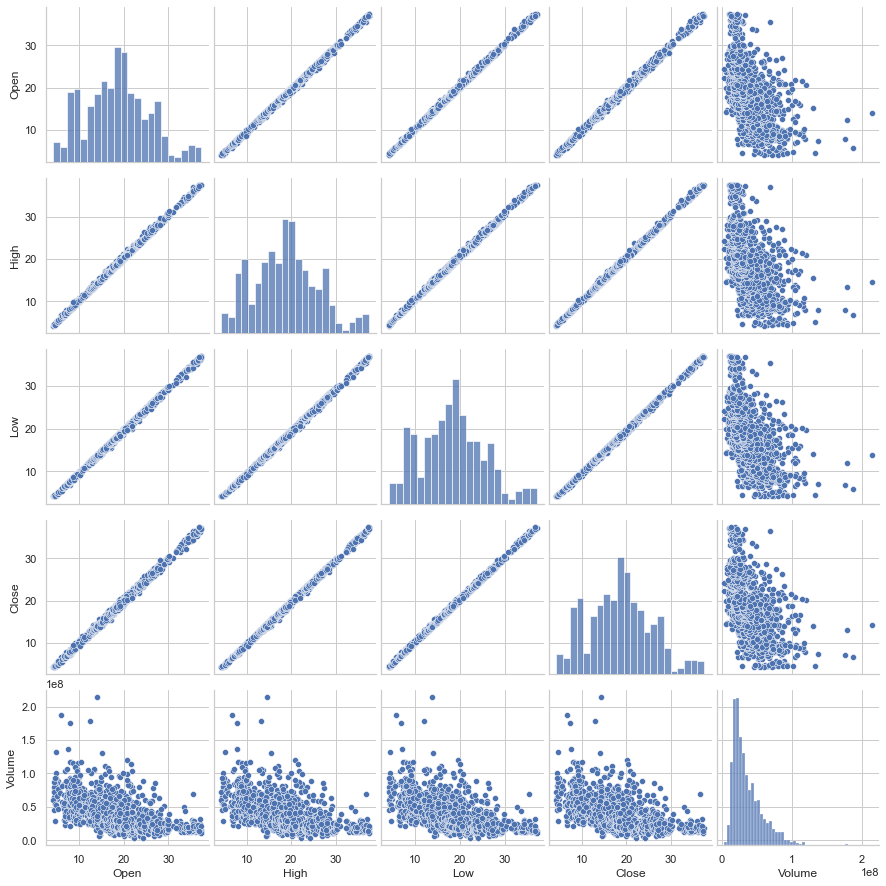

In [8]:
sns.pairplot(df)

**Separação dos dados de treino e a classe**

In [9]:
X = df[['Open','High','Low','Volume']]
y = df['Close']

## Treinando o algoritmo de Regressão Linear

#### Dividindo os dados em 80% treino e 20% teste

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

#### Treinando o modelo

In [11]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

#### Os coeficientes do modelo

In [12]:
lm.coef_

array([-7.00203920e-01,  7.67031075e-01,  9.34203421e-01,  7.19314244e-10])

#### Predizendo 10 preços

In [13]:
lm.predict(X_test)[:10]

array([36.40856195,  6.69703742, 17.56277541, 12.37594471, 23.62538601,
       14.67033273,  9.59006042, 15.85929968, 28.62613816, 18.67056849])

#### Visualizando os preços reais

In [14]:
y_test[:10]

1791    36.55
322      6.79
1033    17.74
162     12.49
1273    23.88
70      14.78
247      9.69
736     16.03
1518    28.71
1006    18.53
Name: Close, dtype: float64

#### Previsão de dados de teste

In [15]:
prediction = lm.predict(X_test)

#### Visualizando os Valores reais em relação aos valores preditos. 

Text(0, 0.5, 'Predicted Y')

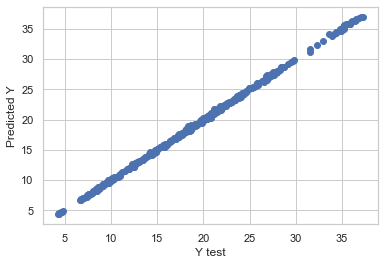

In [16]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

In [17]:
print('Erro médio absoluto:          ', metrics.mean_absolute_error(y_test, prediction))
print('Erro médio quadrático:        ', metrics.mean_squared_error(y_test, prediction))
print('Raiz do erro médio quadrático:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Erro médio absoluto:           0.12580337590206783
Erro médio quadrático:         0.026123915585641224
Raiz do erro médio quadrático: 0.16162894414566106
